In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import seaborn as sns
import pandas as pd

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update({'font.size': 7})
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5

plt.rcParams.update({'mathtext.default':  'regular' })


In [2]:
# define some things

MA90_color = '#e8735c'
G189E_color = '#72c2a6'
SI06_color = '#5482a7'
num_muts_total_CH65 = 16



In [3]:
# read data
df_data = pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20221008_CH65_QCfilt_REPfilt.csv',dtype={"geno":"str"})

In [4]:
# find maximum phenotype for given number of mutations

muts = []
max_pheno_data_MA90 = []
max_pheno_data_MA90_err = []
max_pheno_data_SI06 = []
max_pheno_data_SI06_err = []
max_pheno_data_G189E = []
max_pheno_data_G189E_err = []
for i in range(num_muts_total_CH65+1):
    newdf = df_data.loc[df_data['som_mut']==i]
    index_MA90 = np.argmax(newdf['MA90_mean'])
    max_pheno_data_MA90.append(newdf.iloc[index_MA90]['MA90_mean'])
    max_pheno_data_MA90_err.append(newdf.iloc[index_MA90]['MA90_sem'])    
    index_G189E = np.argmax(newdf['G189E_mean'])
    max_pheno_data_G189E.append(newdf.iloc[index_G189E]['G189E_mean'])
    max_pheno_data_G189E_err.append(newdf.iloc[index_G189E]['G189E_sem'])    
    index_SI06 = np.argmax(newdf['SI06_mean'])
    max_pheno_data_SI06.append(newdf.iloc[index_SI06]['SI06_mean'])
    max_pheno_data_SI06_err.append(newdf.iloc[index_SI06]['SI06_sem'])   


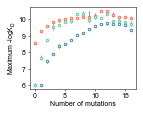

In [5]:
# make the plot

plt.figure(figsize=(2,1.6))
plt.errorbar(x=np.arange(num_muts_total_CH65+1),y=max_pheno_data_MA90,yerr=max_pheno_data_MA90_err,marker='o',
             linewidth=0,elinewidth=1,color=MA90_color,mfc='white',zorder=1,markersize=2.5)

plt.errorbar(x=np.arange(num_muts_total_CH65+1),y=max_pheno_data_SI06,yerr=max_pheno_data_SI06_err,marker='o',
             linewidth=0,elinewidth=1,color=SI06_color,mfc='w',zorder=1,markersize=2.5)

plt.errorbar(x=np.arange(num_muts_total_CH65+1),y=max_pheno_data_G189E,yerr=max_pheno_data_G189E_err,marker='o',
             linewidth=0,elinewidth=1,color=G189E_color,mfc='w',zorder=1,markersize=2.5)

plt.tick_params(pad=2)
plt.xlabel('Number of mutations',labelpad=2)
plt.ylabel('Maximum -log$K_D$',labelpad=0)

legend_elements = [Patch(facecolor=MA90_color, edgecolor=MA90_color,label='MA90'),
                   Patch(facecolor=G189E_color, edgecolor=G189E_color,label='G189E'),
                   Patch(facecolor=SI06_color, edgecolor=SI06_color,label='FluB'),
                    Line2D([0], [0], marker='o', color='k', label='data',
                          markerfacecolor='w', markersize=2.5,linewidth=0),
                  Line2D([0], [0], marker='^', color='k', label='model',
                          markerfacecolor='k', markersize=2.5,linewidth=0)]
# plt.legend(handles=legend_elements,ncol=3,loc='lower center',bbox_to_anchor=(0.5,0.99),
#           handlelength=1.0,handletextpad=0.3,columnspacing=.5,fontsize=7,borderpad=0.5,frameon=False)
plt.tight_layout()
plt.savefig('max_pheno_CH65.pdf')
plt.show()
